# Machine Learning Assignment 1 Question 2 Python Version
Group G  Joanna Andari, Karim Awad, Jiye Ren, Nirbhay Sharma, Qiuyue Zhang, Xiaoyan Zhou
03/12/2017

In [13]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

In [6]:
wine_quality = pd.read_csv('winequality-red.csv', sep = ';')

In [7]:
def decide_good_wine(x):
    if x >= 6:
        return 1
    else:
        return 0
# good_wine = 1: it is good wine (quality >= 6)
wine_quality['good_wine'] = wine_quality.quality.apply(decide_good_wine)

In [8]:
wine_quality_mean = np.mean(wine_quality.iloc[:, 0:11], axis = 0)
wine_quality_std = np.std(wine_quality.iloc[:, 0:11], axis = 0)
wine_quality_normal = pd.DataFrame()
for i in list(range(11)):
    ap = ((wine_quality.iloc[:, i] - np.array(np.zeros(len(wine_quality.axes[0])) + wine_quality_mean[i])) / np.array(np.zeros(len(wine_quality.axes[0])) + wine_quality_std[i]))
    wine_quality_normal = pd.concat([wine_quality_normal, ap], axis = 1)
wine_quality_normal = pd.concat([wine_quality_normal, wine_quality.iloc[:, 11:13]], axis = 1)    

random_seed = 100
wine_quality_normal_shuffled = shuffle(wine_quality_normal, random_state = random_seed)
training_set_normal = wine_quality_normal_shuffled[0:round(len(wine_quality_normal_shuffled.axes[0])/2)]
test_set_normal = wine_quality_normal_shuffled[round(len(wine_quality_normal_shuffled.axes[0])/2):len(wine_quality_normal_shuffled.axes[0])]

In [9]:
KNN_wine_classifier = []
for i in list(range(1, 500, 5)):
    KNN_wine_classifier.append(KNeighborsClassifier(n_neighbors = i))

In [10]:
scores = list()
for i in list(range(len(KNN_wine_classifier))):
    scores.append(list(cross_val_score(KNN_wine_classifier[i], training_set_normal.iloc[:, 0:11], training_set_normal.iloc[:, 12], cv = 5)))
# select the classifier with the higherest average score on the five folds
avg_scores = [sum(scores[i])/5 for i in list(range(len(scores)))]
max_score = max(avg_scores)
max_score_pos = np.argmax(avg_scores)
print('The best performed classifier (with random seed set as ' + str(random_seed) + ') is the ' + str(max_score_pos + 1) + 'th' + ' classifier, with an average validation score of ' + str(max_score) + '.')

The best performed classifier (with random seed set as 100) is the 48th classifier, with an average validation score of 0.749996191257.


In [11]:
# train this classifier again using all data (here the training_set_normal)
KNN_wine_classifier[max_score_pos].fit(training_set_normal.iloc[:, 0:11], training_set_normal.iloc[:, 12])

# prediction
test_score = KNN_wine_classifier[max_score_pos].predict(test_set_normal.iloc[:, 0:11])
print('Classification Report')

print(classification_report(y_true = test_set_normal.iloc[:, 12],
                            y_pred = test_score,
                            target_names = ['Not good wine', 'Good wine']))

x = confusion_matrix(y_true = test_set_normal.iloc[:, 12],
                     y_pred = test_score)
print('Confusion Matrix')
print(x)
print('Total Error Rate = ' + str((x[0, 1] + x[1, 0]) / sum(sum(x))))
print('Accuracy = ' + str(1 - (x[0, 1] + x[1, 0]) / sum(sum(x))))
print('Sensitivity = ' + str(x[0, 0] / (x[0, 0] + x[0, 1])))
print('Specificity = ' + str(x[1, 1] / (x[1, 0] + x[1, 1])))

Classification Report
               precision    recall  f1-score   support

Not good wine       0.67      0.75      0.71       365
    Good wine       0.77      0.69      0.73       434

  avg / total       0.72      0.72      0.72       799

Confusion Matrix
[[275  90]
 [136 298]]
Total Error Rate = 0.282853566959
Accuracy = 0.717146433041
Sensitivity = 0.753424657534
Specificity = 0.6866359447


Q: How do you judge whether the classifier is well-suited for the data set?

A: After normalising the whole data set as specified by Wolfram on the Hub, we split the data into 5 subsets and train the models on 4 of the subsets while validate on the rest one. The models are all KNN method with the k set to be 1, 6, 11, ..., until 500 (100 in total). Then for each model, we calculate the average cross validation scores and choose the one with highest score. At last, after the best model is trained on all training data (50% of original data), we test it on the test data (the second half of randomly shuffled data) and obtain an estimated precision rate of approximately 0.72.

   The accuracy of the selected classifier is the highest amoung all available classifiers. This classifier minimises the total error rate through choosing the k that minimises the sum of estimation bias and variance.
   
   We want the specificity and sensitivity of the classifier to be close to 1, and also the balance of the two ratios is kept. Realistically, we cannot totally eliminate one in order to make another one equals 1 (e.g. classifying all wines as good wine). The ratios of the selected classifier are 0.7534 and 0.6866 respectively which is satisfyingly balanced as well as close to 1.
   
   In terms of algorithm speed, KNN method has fast training phase as it basically just "plots" the training data points in the "hypercube" and has slow classification phase as it needs to calculate the distance between every pair of training-test nodes and makes decisions based on the number of categories & ranking of distances, which can incur huge amount of calculation when the data set is large. The purpose of our classifier is to decide whether a wine is "good wine" or not, and it would not be needed for a large amount (e.g. trillions) of data or data that are generated with a high frequncy (e.g. every millisecond). Therefore, the classification speed is not really a concern for this data set.
   
   It worths mentioning that, when implementing KNN menthod on this data set, the results vary greatly. When setting random seed as 0, the optimal k is 41; when the seed is set as 50, the optimal k is 76; when setting the seed 75, k is 16. However, when we adjust the random seed to a even larger number, the optimal k becomes significantly larger as well.

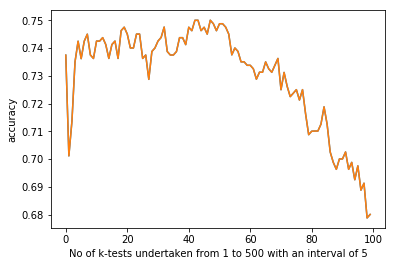

In [15]:
plt.plot(list(range(100)), avg_scores)
plt.xlabel("No of k-tests undertaken from 1 to 500 with an interval of 5")
plt.ylabel("accuracy")
plt.show()